<a href="https://colab.research.google.com/github/Abhi-3026/AI_ML_AVEN/blob/main/OTT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

STEP 1:Loading the DATA

In [31]:
netflix_df = pd.read_csv("/content/NetflixOriginals.csv", encoding='latin-1')
disney_df = pd.read_csv("/content/disney_plus_titles.csv", encoding='latin-1')
amazon_df = pd.read_csv("/content/amazon_prime_titles.csv", encoding='latin-1')

print("Netflix Data:\n", netflix_df.head())
print("\nDisney+ Data:\n", disney_df.head())
print("\nAmazon Data:\n", amazon_df.head())

Netflix Data:
              Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  

Disney+ Data:
   show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                    

STEP 2:CLEAN AND FORMAT DATA

In [7]:
import pandas as pd

# Loading the three datasets
netflix_df = pd.read_csv("NetflixOriginals.csv", encoding='latin-1') # or 'iso-8859-1' or 'cp1252'
disney_df = pd.read_csv("disney_plus_titles.csv", encoding='latin-1') # or 'iso-8859-1' or 'cp1252'
amazon_df = pd.read_csv("amazon_prime_titles.csv", encoding='latin-1')  # or 'iso-8859-1' or 'cp1252'

netflix_df = netflix_df.rename(columns={
    'Title': 'title',
    'Premiere': 'release_date',
    'Runtime': 'runtime',
    'IMDB Score': 'imdb_score',
    'Language': 'language',
    'Genre': 'genre'
})[['title', 'release_date', 'runtime', 'imdb_score', 'language', 'genre']]
netflix_df['platform'] = 'Netflix'

disney_df = disney_df.rename(columns={
    'title': 'title',
    'release_year': 'release_date',
    'duration': 'runtime',
    'rating': 'rating',
    'listed_in': 'genre'
})[['title', 'release_date', 'runtime', 'rating', 'genre']]
disney_df['platform'] = 'Disney+'

amazon_df = amazon_df.rename(columns={
    'title': 'title',
    'release_year': 'release_date',
    'duration': 'runtime',
    'rating': 'rating',
    'listed_in': 'genre'
})[['title', 'release_date', 'runtime', 'rating', 'genre']]
amazon_df['platform'] = 'Amazon Prime'

def convert_runtime(runtime):
      if 'min' in str(runtime):
        return int(runtime.replace('min', '').strip())
      elif 'Season' in str(runtime):
        return 60
      else:
        return pd.NA

for df in [netflix_df,disney_df, amazon_df]:
    df['runtime'] = df['runtime'].apply(convert_runtime)

combined_df['genre'] = combined_df['genre'].apply(lambda x: ', '.join(str(x).split('/')))

combined_df['language'] = combined_df['language'].fillna('Unknown')
combined_df['rating'] = combined_df['rating'].fillna('Not Available')

combined_df.to_csv("combined_ott_data_cleaned.csv", index=False)


STEP 3: Analyzing the Combined Dataset

Summary Statistics by Platform:
              avg_imdb_score  median_imdb_score  max_imdb_score  avg_runtime  \
platform                                                                       
Amazon Prime             NaN                NaN             NaN    91.311876   
Disney+                  NaN                NaN             NaN    71.910646   
Netflix             6.271747               6.35             9.0    93.577055   

              total_titles  
platform                    
Amazon Prime          9668  
Disney+               1450  
Netflix                584  

Missing Values:
title               0
release_date        5
runtime          2252
imdb_score      11118
language            0
genre               0
platform            0
rating              0
dtype: int64

Top Rated Titles by Platform:
                                                 title      platform  \
583           David Attenborough: A Life on Our Planet       Netflix   
582          Emicida: AmarElo - It's All 

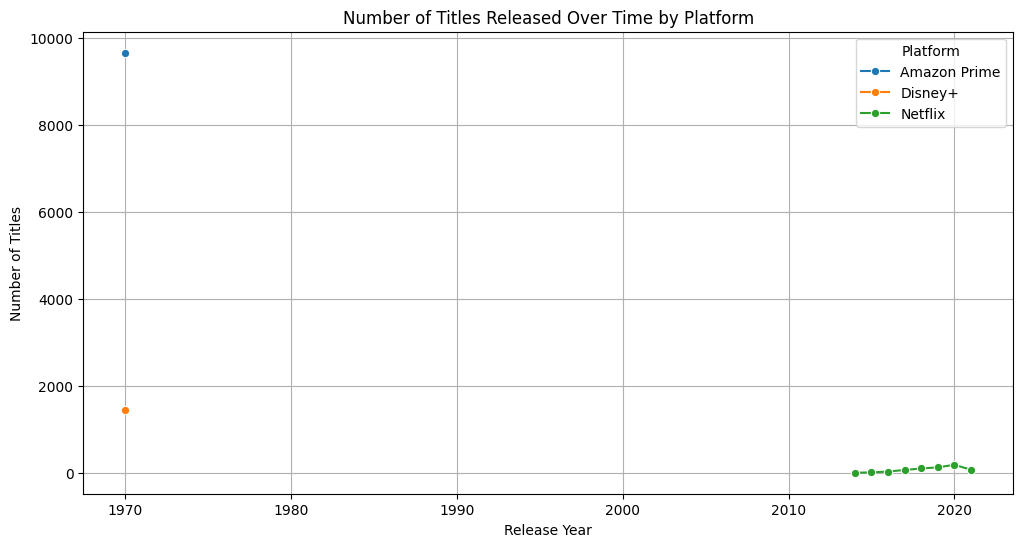

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
combined_df = pd.read_csv("combined_ott_data_cleaned.csv")

def clean_runtime(runtime):
    if pd.isna(runtime):
        return None
    elif isinstance(runtime, str):
        if "Season" in runtime:
            return None
        numeric_part = ''.join(filter(str.isdigit, runtime))
        return int(numeric_part) if numeric_part else None
    return runtime

combined_df['runtime'] = combined_df['runtime'].apply(clean_runtime)
combined_df['runtime'] = pd.to_numeric(combined_df['runtime'], errors='coerce')

def calculate_summary_stats(df):
    df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')  # Convert IMDb scores to numeric

    summary = df.groupby('platform').agg({
        'imdb_score': ['mean', 'median', 'max'],
        'runtime': 'mean',
        'title': 'count'
    })
    summary.columns = ['avg_imdb_score', 'median_imdb_score', 'max_imdb_score', 'avg_runtime', 'total_titles']
    return summary

summary_stats = calculate_summary_stats(combined_df)
print("Summary Statistics by Platform:")
print(summary_stats)

missing_values = combined_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

def top_rated_titles(df, top_n=5):
    return df.sort_values(by='imdb_score', ascending=False).groupby('platform').head(top_n)

top_titles = top_rated_titles(combined_df)
print("\nTop Rated Titles by Platform:")
print(top_titles[['title', 'platform', 'imdb_score']])

def genre_distribution(df):
    genre_counts = df['genre'].str.split(', ').explode().value_counts()  # Handle multiple genres
    return genre_counts

genre_counts = genre_distribution(combined_df)
print("\nGenre Distribution Across Platforms:")
print(genre_counts)

def release_trends(df):
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year  # Extract release year
    release_data = df.groupby(['platform', 'release_year'])['title'].count().reset_index()
    return release_data

release_data = release_trends(combined_df)
print("\nRelease Trends by Platform:")
print(release_data)


plt.figure(figsize=(12, 6))
sns.lineplot(data=release_data, x='release_year', y='title', hue='platform', marker='o')
plt.title("Number of Titles Released Over Time by Platform")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Platform")
plt.grid(True)
plt.show()


combined_df.to_csv("processed_ott_data.csv", index=False)
release_data.to_csv("release_trends.csv", index=False)


Filling the Missing values

Summary Statistics by Platform:
              avg_imdb_score  median_imdb_score  max_imdb_score  avg_runtime  \
platform                                                                       
Amazon Prime        6.271747           6.271747        6.271747    85.307302   
Disney+             6.271747           6.271747        6.271747    68.641379   
Netflix             6.271747           6.350000        9.000000          NaN   

              total_titles  
platform                    
Amazon Prime          9668  
Disney+               1450  
Netflix                584  

Remaining Missing Values:
title             0
release_date      0
runtime         584
imdb_score        0
language          0
genre             0
platform          0
rating            0
dtype: int64

Top Rated Titles by Platform:
                                            title      platform  imdb_score
583      David Attenborough: A Life on Our Planet       Netflix    9.000000
582     Emicida: AmarElo - It's All For

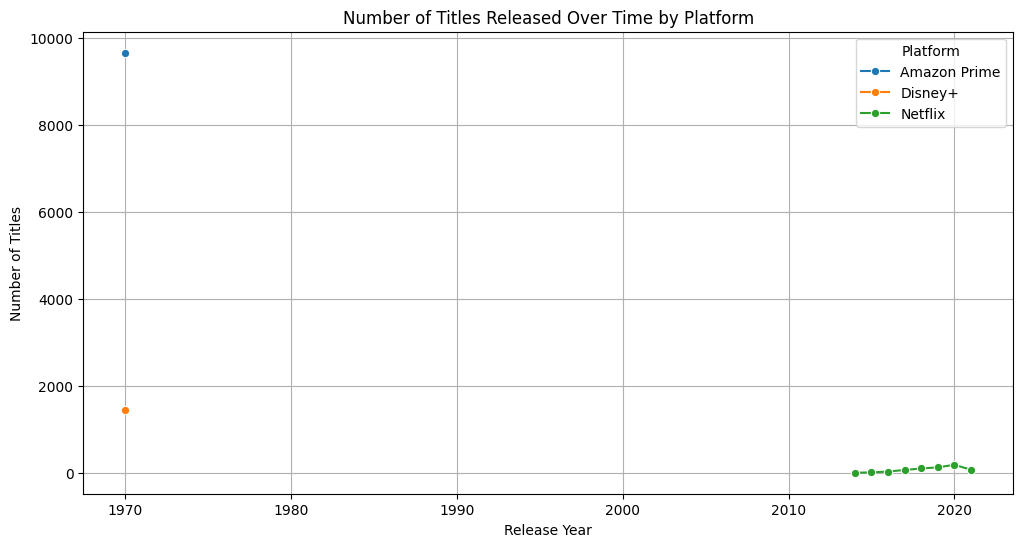

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
combined_df = pd.read_csv("combined_ott_data_cleaned.csv")

def convert_runtime(runtime):
    if 'min' in str(runtime):
        return int(runtime.replace('min', '').strip())
    elif 'Season' in str(runtime):
        return 60
    else:
        return pd.NA

combined_df['runtime'] = combined_df['runtime'].apply(convert_runtime)
combined_df['runtime'] = pd.to_numeric(combined_df['runtime'], errors='coerce')

combined_df['imdb_score'] = combined_df.groupby('platform')['imdb_score'].transform(
    lambda x: x.fillna(x.mean())
)
combined_df['imdb_score'] = combined_df['imdb_score'].fillna(combined_df['imdb_score'].mean())


combined_df['runtime'] = combined_df.groupby('platform')['runtime'].transform(
    lambda x: x.fillna(x.median())
)

combined_df['release_date'] = combined_df['release_date'].fillna("Unknown")


def calculate_summary_stats(df):
    df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
    summary = df.groupby('platform').agg({
        'imdb_score': ['mean', 'median', 'max'],
        'runtime': 'mean',
        'title': 'count'
    })
    summary.columns = ['avg_imdb_score', 'median_imdb_score', 'max_imdb_score', 'avg_runtime', 'total_titles']
    return summary

summary_stats = calculate_summary_stats(combined_df)
print("Summary Statistics by Platform:")
print(summary_stats)


print("\nRemaining Missing Values:")
print(combined_df.isnull().sum())


def top_rated_titles(df, top_n=5):
    return df.sort_values(by='imdb_score', ascending=False).groupby('platform').head(top_n)

top_titles = top_rated_titles(combined_df)
print("\nTop Rated Titles by Platform:")
print(top_titles[['title', 'platform', 'imdb_score']])


def genre_distribution(df):
    genre_counts = df['genre'].str.split(', ').explode().value_counts()
    return genre_counts

genre_counts = genre_distribution(combined_df)
print("\nGenre Distribution Across Platforms:")
print(genre_counts)


def release_trends(df):
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
    release_data = df.groupby(['platform', 'release_year'])['title'].count().reset_index()
    return release_data

release_data = release_trends(combined_df)
print("\nRelease Trends by Platform:")
print(release_data)


plt.figure(figsize=(12, 6))
sns.lineplot(data=release_data, x='release_year', y='title', hue='platform', marker='o')
plt.title("Number of Titles Released Over Time by Platform")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Platform")
plt.grid(True)
plt.show()

combined_df.to_csv("processed_ott_data.csv", index=False)
release_data.to_csv("release_trends.csv", index=False)


STEP 4: Visualization and Analysis

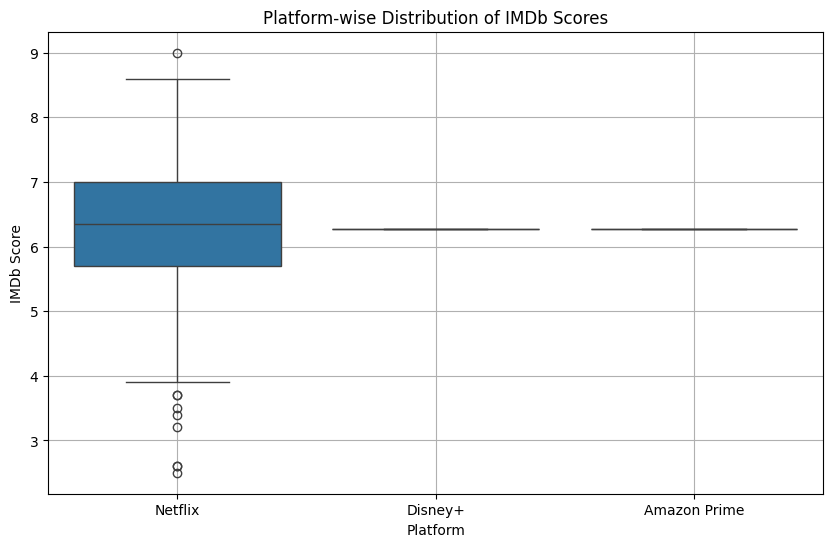

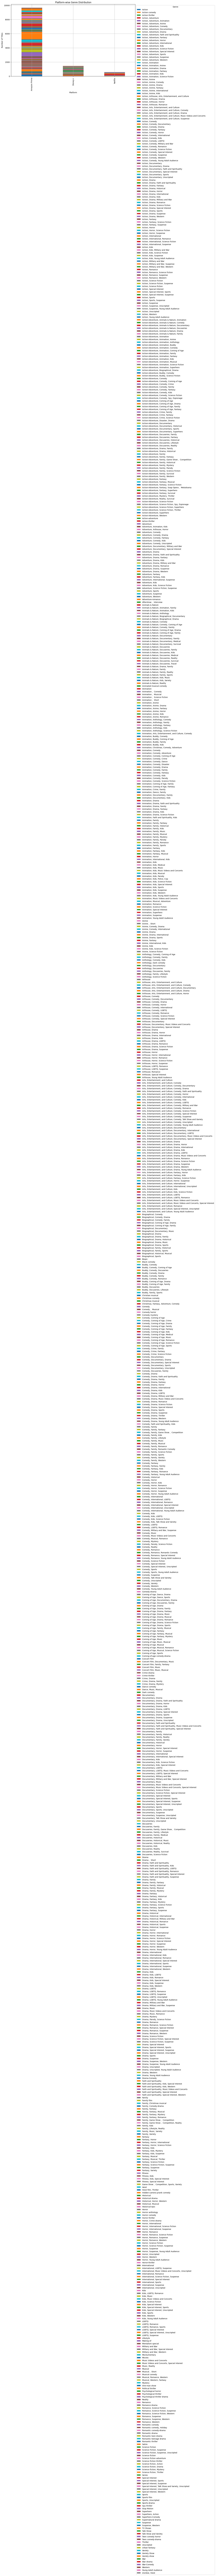

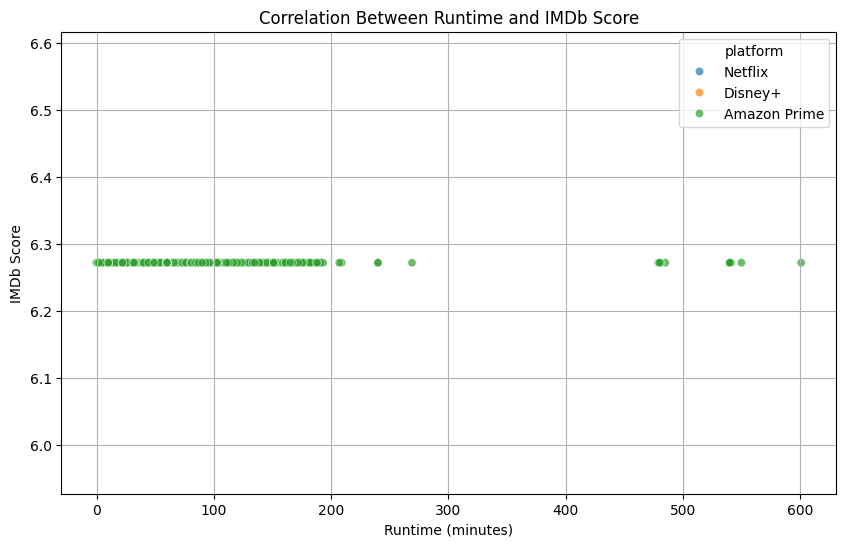

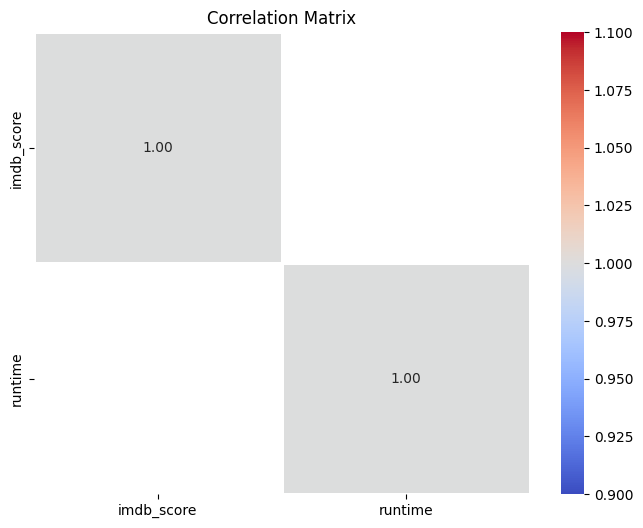

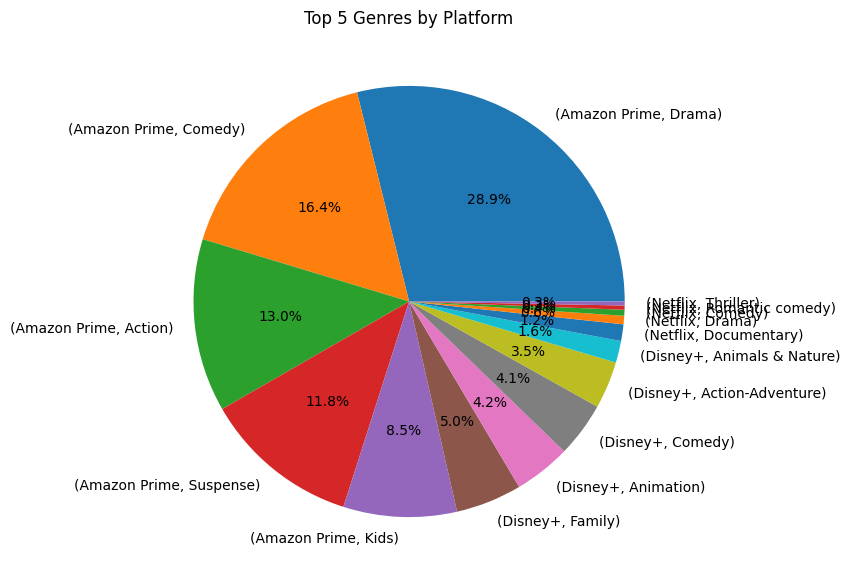

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
combined_df = pd.read_csv("processed_ott_data.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='platform', y='imdb_score')
plt.title('Platform-wise Distribution of IMDb Scores')
plt.xlabel('Platform')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

genre_counts_platform = combined_df.groupby('platform')['genre'].value_counts().unstack().fillna(0)
genre_counts_platform.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Platform-wise Genre Distribution')
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='runtime', y='imdb_score', hue='platform', alpha=0.7)
plt.title('Correlation Between Runtime and IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()


numerical_cols = ['imdb_score', 'runtime']
correlation_matrix = combined_df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

top_genres_platform = combined_df.groupby('platform')['genre'].apply(lambda x: x.str.split(', ').explode().value_counts().head(5))
top_genres_platform.plot(kind='pie', y='genre', figsize=(12, 7), autopct='%1.1f%%', legend=False)
plt.title('Top 5 Genres by Platform')
plt.ylabel('')
plt.show()


<ipython-input-17-c47330823fac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[col] = df_predict[col].apply(lambda x: -1 if pd.isnull(x) or 'Unknown' in str(x) else x)
<ipython-input-17-c47330823fac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[column] = pd.to_numeric(df_predict[column], errors='coerce')
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['language']. At least one non-missing value is

Mean Squared Error: 3.1554436208840472e-30
R-squared: -3.0


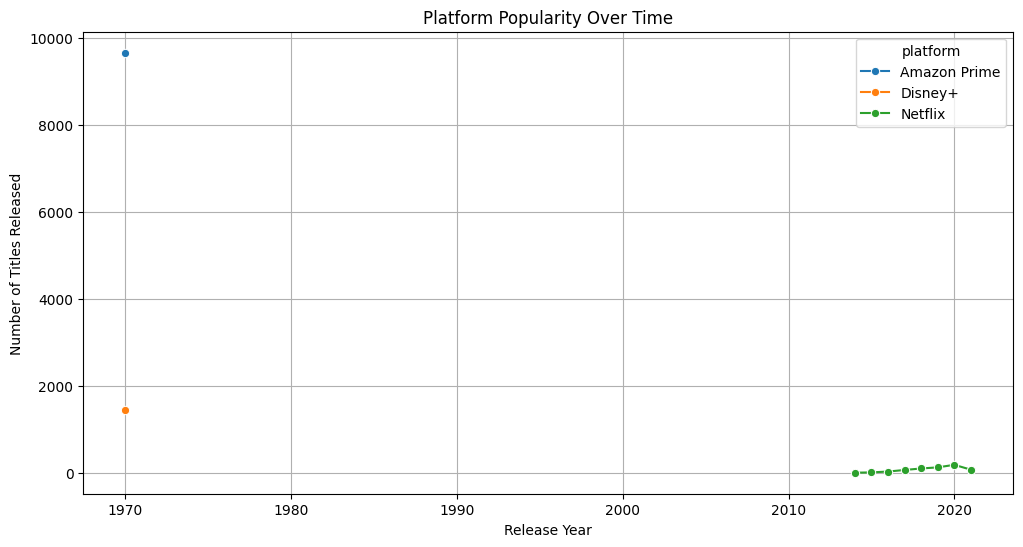

<ipython-input-17-c47330823fac>:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=genre_popularity, x='release_year', y='count', hue='genres_list', marker='o', ci=None)


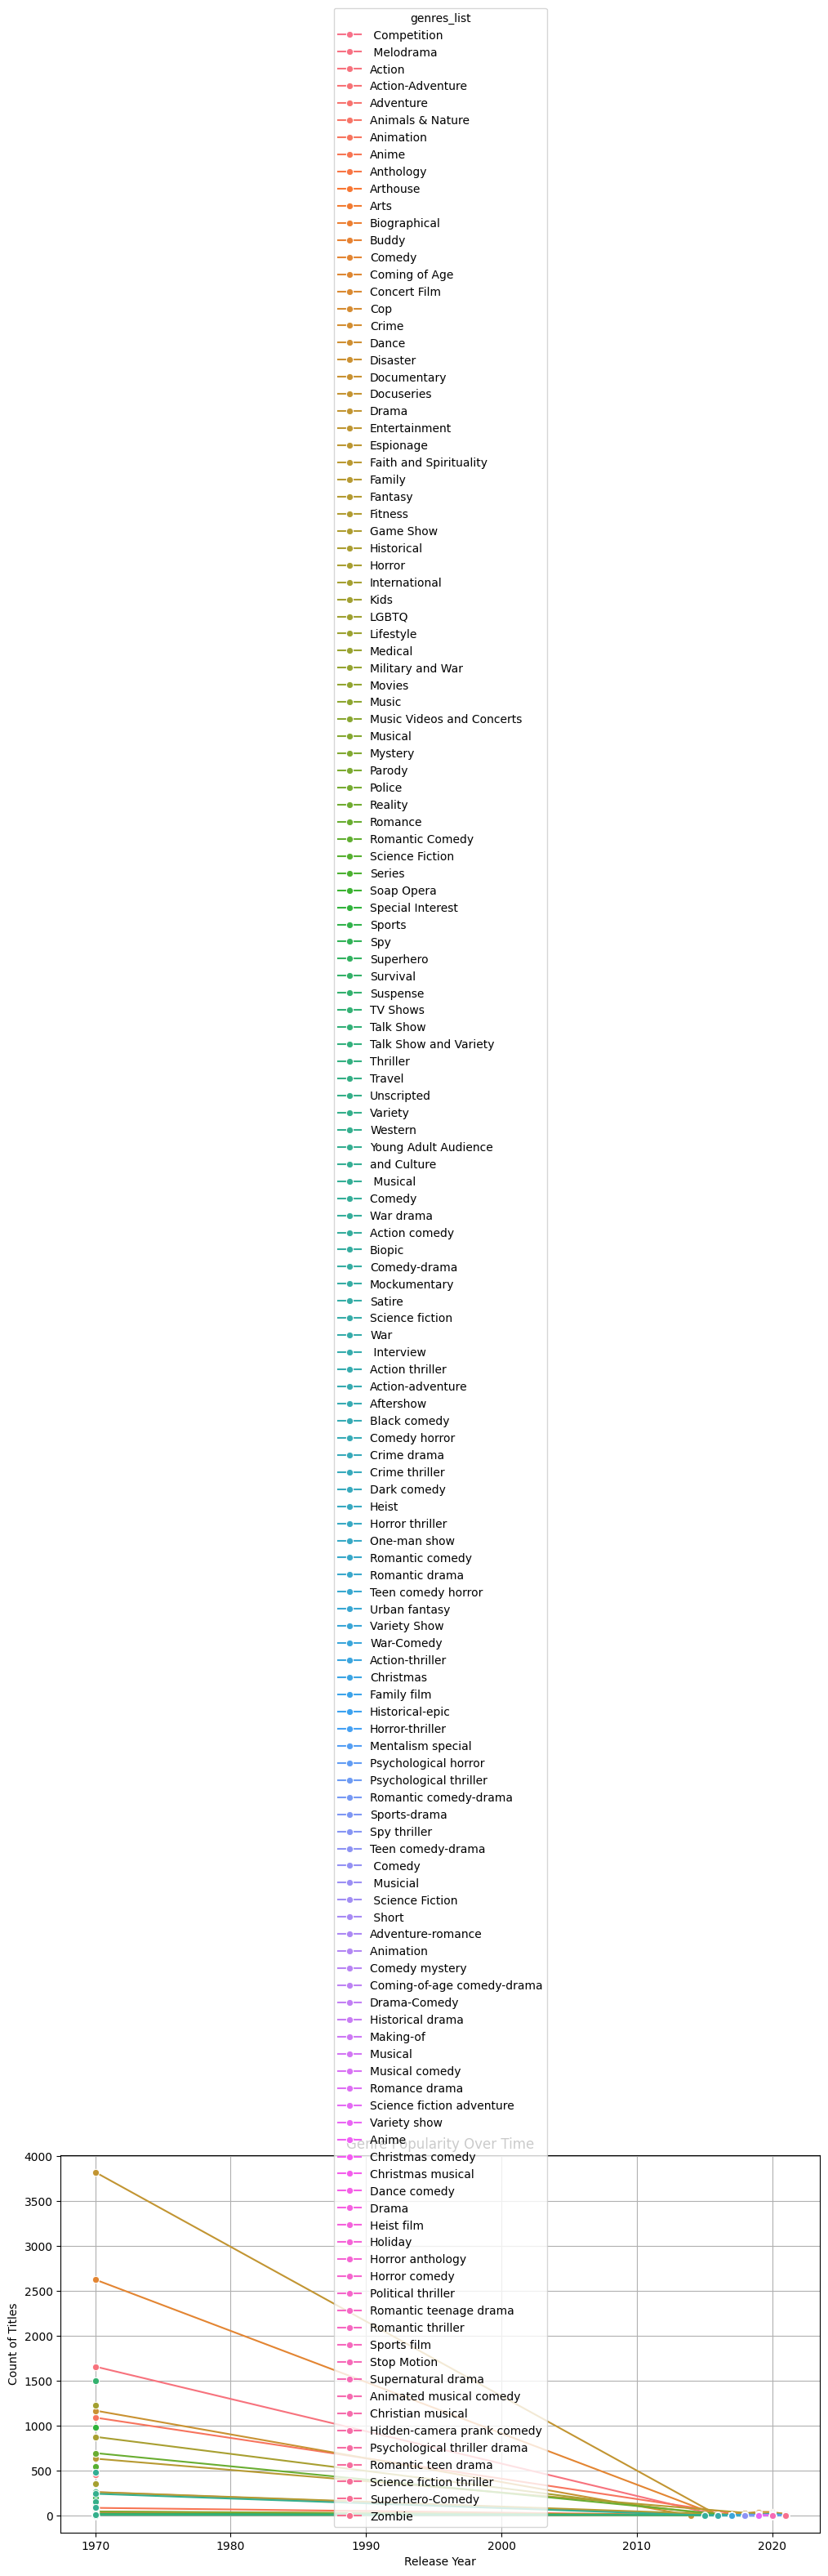


Feature Engineering - First 5 Rows:
             title  runtime  is_movie
0  Enter the Anime      NaN         0
1      Dark Forces      NaN         0
2          The App      NaN         0
3   The Open House      NaN         0
4      Kaali Khuhi      NaN         0


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_df['release_year'] = pd.to_datetime(combined_df['release_date'], errors='coerce').dt.year

df_predict = combined_df.dropna(subset=['imdb_score', 'runtime', 'release_year'])

for col in ['platform', 'genre', 'release_date']:
    df_predict[col] = df_predict[col].apply(lambda x: -1 if pd.isnull(x) or 'Unknown' in str(x) else x)
for column in df_predict.columns:
    try:
        df_predict[column] = pd.to_numeric(df_predict[column], errors='coerce')
    except:
        pass
df_predict = pd.get_dummies(df_predict, columns=['platform', 'genre'], drop_first=True, dummy_na=False)

from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')

X = df_predict.drop(columns=['imdb_score', 'title', 'release_date'])
y = df_predict['imdb_score']
X = num_imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

platform_popularity = combined_df.groupby(['platform', 'release_year'])['title'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_popularity, x='release_year', y='title', hue='platform', marker='o')
plt.title('Platform Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.show()

combined_df['genres_list'] = combined_df['genre'].str.split(', ')

genre_popularity = combined_df.explode('genres_list')

genre_popularity = genre_popularity.groupby(['release_year', 'genres_list']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_popularity, x='release_year', y='count', hue='genres_list', marker='o', ci=None)
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.grid(True)
plt.show()

combined_df['is_movie'] = combined_df['runtime'].apply(lambda x: 1 if pd.notnull(x) and x < 120 else 0)

print("\nFeature Engineering - First 5 Rows:")
print(combined_df[['title', 'runtime', 'is_movie']].head())
